<a href="https://colab.research.google.com/github/VinaySingh561/Recommender_System/blob/main/Recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Recommender System

Introducing my recommendation system algorithm developed using Linear Regression! This algorithm leverages the power of machine learning to provide personalized movie recommendations based on user preferences and movie attributes. By applying Linear Regression, the algorithm predicts ratings for unseen movies, enabling accurate and tailored recommendations for users

In [1]:
# Necessay Libraries
import numpy as np
import pandas as pd

In the next step, the user ratings are loaded from an Excel file using the pandas library. The ratings are stored in a pandas DataFrame called ``y``

In [2]:
#user ratings
y = pd.read_excel('/content/ex8_movies.xlsx', sheet_name = 'y', header = None)

In [3]:
y.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5,4,0,0,4,4,0,0,0,4,...,2,3,4,0,4,0,0,5,0,0
1,3,0,0,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
2,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,3,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In order to determine whether the user has provided ratings or not, the code reads the 'R' sheet from the 'ex8_movies.xlsx' Excel file.

In [4]:
#now finding whether user have given ratings  or not
r = pd.read_excel('/content/ex8_movies.xlsx', sheet_name = 'R', header = None)

In [5]:
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,True,True,False,False,True,True,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The code replaces True values with 1 and False values with 0 in each column of the DataFrame r using a loop: r = r.apply(lambda x: x.replace({True: 1, False: 0})).

In [6]:
for i in range(len(r.columns)):
  r[i] = r[i].replace({True:1, False:0})

In [7]:
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1,1,0,0,1,1,0,0,0,1,...,1,1,1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Features

In [8]:
#now finding whether user have given ratings  or not
X = pd.read_excel('/content/movie_params.xlsx', sheet_name = 'X', header = None)

In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.048686,-0.400232,1.194119,0.371128,0.407607,0.974407,-0.058410,0.861721,-0.697290,0.288746
1,0.780851,-0.385626,0.521198,0.227355,0.570109,0.641264,-0.550006,0.704021,-0.485835,-0.564624
2,0.641509,-0.547854,-0.083796,-0.598519,-0.017694,0.299736,-0.720807,0.838546,-0.694832,-1.134796
3,0.453618,-0.800218,0.680481,-0.081743,0.136601,0.907561,0.277682,0.369300,-1.261208,-0.235581
4,0.937538,0.106090,0.361953,0.086646,0.287505,0.518644,-0.056871,0.914573,-0.819334,-0.542847


### Coefficients

In [10]:
#now finding whether user have given ratings  or not
theta = pd.read_excel('/content/movie_params.xlsx', sheet_name = 'theta', header = None)

In [11]:
theta.head()

,0,1,2,3,4,5,6,7,8,9
0,0.285444,-1.684265,0.262939,-0.287317,0.585725,0.980188,-0.063375,0.767232,-1.104602,-0.251867
1,0.505013,-0.454648,0.317462,-0.115087,0.567704,0.818905,0.461649,1.093063,-1.200294,-0.391617
2,-0.431917,-0.478804,0.846711,-0.011731,-0.138578,0.742591,-0.440276,1.363340,-0.325235,-0.194682
3,0.728598,-0.271894,0.326844,-0.250724,-0.471017,1.215827,-0.106129,1.615801,-0.670805,0.129868
4,0.052119,-1.380697,0.637941,-0.231980,0.246337,1.438879,-0.860022,0.668077,-0.560330,0.414959


#### Shapes

In [12]:
# no. of movies and no. of users
y.shape

(1682, 943)

In [13]:
# no. of movies and their respective features
X.shape

(1682, 10)

In [14]:
theta.shape

(943, 10)

### Costfunction

In [17]:
def costfunction(X, y, r, theta, Lambda):
    predictions = np.dot(X, theta.T)
    err = predictions-y
    J = 1/2 * np.sum((err**2) * r)
    reg_x = Lambda/2 *(np.sum(theta**2))
    reg_theta = Lambda/2 *(np.sum(X**2))
    grad = J + reg_x + reg_theta
    return J, grad

### Gradient Descent

In [18]:
def gradientDescent(X, y, r, theta, Lambda, num_iter, alpha):
    J_hist = []
    for i in range(num_iter):
        cost, grad = costfunction(X, y, r, theta, Lambda)
        X = X -  alpha*(np.dot(np.dot(X, theta.T) - y, theta) + Lambda*X)
        theta = theta - alpha*(np.dot((np.dot(X, theta.T) - y).T, X) + Lambda*theta)
        J_hist.append(cost)
    return X, theta, J_hist

### Normalizing the ratings

In [19]:
def normalizeRatings(y, r):
    ymean = np.sum(y, axis=1)/np.sum(r, axis=1)
    ynorm = np.sum(y, axis=1)*np.sum(r, axis=1) - ymean
    return ymean, ynorm

### New entry for prediction

In [20]:
## new entry [ my entry]
my_ratings = np.zeros((1682,1))
my_ratings[5] = 5
my_ratings[50] = 1
my_ratings[9] = 5
my_ratings[27]= 4
my_ratings[58] = 3
my_ratings[88]= 2
my_ratings[123]= 4
my_ratings[165] = 1
my_ratings[187]= 3
my_ratings[196] = 2
my_ratings[228]= 4
my_ratings[258] = 5
my_ratings[343] = 4
my_ratings[478] = 1
my_ratings[511]= 4
my_ratings[690] = 5
my_ratings[722]= 1
my_ratings[789]= 3
my_ratings[832] = 2
my_ratings[1029]= 4
my_ratings[1190] = 2
my_ratings[1245]= 5

Adding new entry into the dataset

In [21]:
y1 = np.hstack((my_ratings, y))

In [28]:
y1.shape

(1682, 944)

In [22]:
my_r = np.zeros((1682,1))
for i in range(len(r)):
    if my_ratings[i] !=0:
        my_r[i] = 1


r1 = np.hstack((my_r, r))

Finding mean and norm of the user ratings to a particular movie.

In [52]:
# normalizing ratings
y_mean , y_norm  = normalizeRatings(y1,r1)

### Predicting

In [53]:
num_users = y1.shape[1]
num_movies = y1.shape[0]
num_features = X.shape[1]
Lambda = 10
X1 = np.random.randn(num_movies,num_features)
theta1 = np.random.randn(num_users,num_features)

X_,theta_,Cost_ = gradientDescent(X1,y1,r1,theta1,Lambda,500,0.001)

### Cost Function plot

Text(0.5, 1.0, 'Cost function using Gradient Descent')

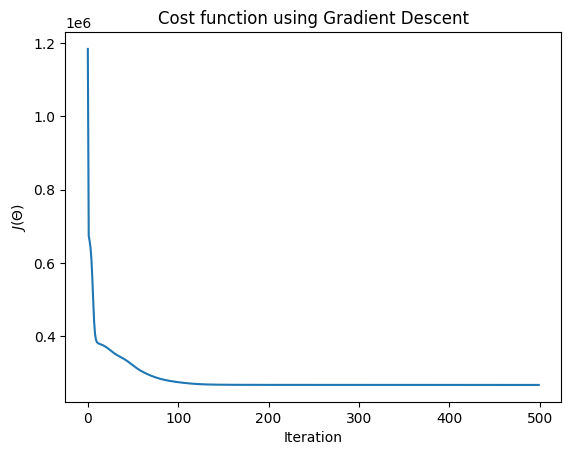

In [54]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Cost_)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Cost is decreasing as num of iterations grows it means algorithm is working fine.


Recommend movies

In [55]:
p = np.dot(X_,theta_.T)

In [56]:
##my predictions
my_pred = p[:,0]+y_mean
my_pred = pd.DataFrame(my_pred)

### Adding it to the movies

In [37]:
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        with open('/content/movie_ids.txt', 'r', encoding=encoding) as file:
            movies = file.read().split("\n")[:-1]
        break
    except UnicodeDecodeError:
        continue

In [58]:
df = pd.DataFrame(np.hstack((my_pred,np.array(movies)[:,np.newaxis])))

Final dataframe after prediction

In [59]:
df.head()

,0,1
0,3.862257941185488,1 Toy Story (1995)
1,3.342019090962669,2 GoldenEye (1995)
2,3.055113229446573,3 Four Rooms (1995)
3,3.734726638255975,4 Get Shorty (1995)
4,3.2931103503518937,5 Copycat (1995)


Top 10 movies for the new user

In [70]:
df.sort_values(by=[0],ascending=False,inplace=True)
df.head(10)

,0,1
1499,5.010296661451397,1500 Santa with Muscles (1996)
813,5.010255419003194,"814 Great Day in Harlem, A (1994)"
1188,5.009263036511271,1189 Prefontaine (1997)
1200,5.007146208818198,1201 Marlene Dietrich: Shadow and Light (1996)
1652,5.001847372233769,1653 Entertaining Angels: The Dorothy Day Stor...
1292,5.001842770827079,1293 Star Kid (1997)
1535,5.001190813142265,1536 Aiqing wansui (1994)
1598,4.999940312216845,1599 Someone Else's America (1995)
1121,4.9990963888026245,1122 They Made Me a Criminal (1939)
1466,4.998621195716798,"1467 Saint of Fort Washington, The (1993)"


In conclusion, this project involved building a recommendation system algorithm using Linear Regression. The algorithm utilized user ratings and movie attributes to provide personalized movie recommendations. The user ratings were loaded from an Excel file and processed to determine which movies had been rated. By applying Linear Regression, the algorithm predicted ratings for unseen movies, enabling accurate recommendations. The code also included a step to convert the ratings into binary values representing whether a user had rated a movie or not. This recommendation system algorithm can be a valuable tool for providing tailored movie suggestions to users based on their preferences.